variables: k, epsilon, n_iter, privacy budget

- epsilon = 0.5,1,2,5
- k depends on dataset, can try around 10 values close to true number of groups. 
- n_iter = 3,4,5,6,7,8 maybe? 

Privacy Budget Choices
- Uniform
- Dichotomy
- Series Sum

Most basic analysis required: for epsilon=1 vary the number of centers, number of iterations and try different privacy budget allocation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lloyd import PrivacyBudget, dplloyd
from evaluation_utils import kmeans_loss
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

master_rng = np.random.default_rng(42)

### Initial Experimentation: How many iterations is preferable? 

(3, 3, 2)


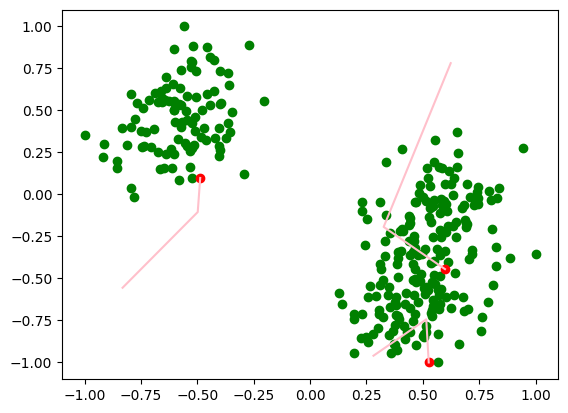

Loss:  0.1462954199633054


In [55]:
data = np.load("datasets/synthetic-gaussian.npy")
p = PrivacyBudget(epsilon=1, method="uniform", total_iter=2)
centers = np.array(dplloyd(k=3, X=data, n_iter=2, priv=p, seed=123, return_steps=True))

print(centers.shape)
#non_private_centers = KMeans(n_clusters=3).fit(data).cluster_centers_

fig = plt.figure()
ax = plt.axes()
ax.scatter(data[:,0], data[:,1], c='green')
#ax.scatter(non_private_centers[:,0], non_private_centers[:,1], c='red')
ax.plot(centers[:,:,0], centers[:,:,1], c="pink")
ax.scatter(centers[-1,:,0], centers[-1,:,1], c="red")

plt.show()

print("Loss: ", kmeans_loss(centers[-1,:,:], data))

(6, 3, 2)


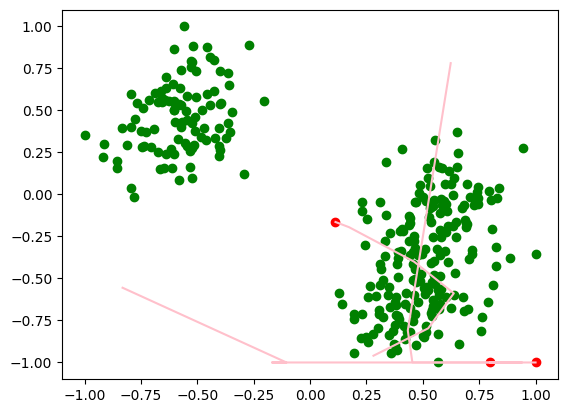

In [56]:
# what happens when the number of iterations is too hight?

p = PrivacyBudget(epsilon=1, method="dichotomy", total_iter=5)
centers = np.array(dplloyd(k=3, X=data, n_iter=5, priv=p, seed=123, return_steps=True))

print(centers.shape)
#non_private_centers = KMeans(n_clusters=3).fit(data).cluster_centers_

fig = plt.figure()
ax = plt.axes()
ax.scatter(data[:,0], data[:,1], c='green')
#ax.scatter(non_private_centers[:,0], non_private_centers[:,1], c='red')
ax.plot(centers[:,:,0], centers[:,:,1], c="pink")
ax.scatter(centers[-1,:,0], centers[-1,:,1], c="red")

plt.show()

Center 0, Iteration 0, points assigned 17, n [43.17109723], s[ 53.73089868 -85.87670344]
Center 1, Iteration 0, points assigned 2629, n [2655.17109723], s[856.72700817 499.38355838]
Center 2, Iteration 0, points assigned 1950, n [1976.17109723], s[-927.59753169  149.08411864]
Center 3, Iteration 0, points assigned 605, n [631.17109723], s[ 348.93883375 -215.96113139]
Center 4, Iteration 0, points assigned 9, n [35.17109723], s[ 52.26051369 -81.7770958 ]
Center 0, Iteration 1, points assigned 4, n [30.17109723], s[ 55.46889579 -85.12548233]
Center 1, Iteration 1, points assigned 2610, n [2636.17109723], s[788.68267507 467.10297003]
Center 2, Iteration 1, points assigned 1993, n [2019.17109723], s[-942.17937633  170.99929383]
Center 3, Iteration 1, points assigned 603, n [629.17109723], s[ 429.74533361 -206.76284746]
Center 0, Iteration 2, points assigned 4, n [30.17109723], s[ 55.46889579 -85.12548233]
Center 1, Iteration 2, points assigned 2006, n [2032.17109723], s[758.05282981 386.69

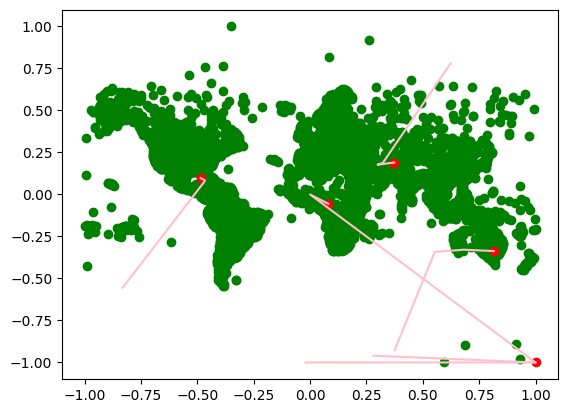

Loss:  0.07367006321041424


In [10]:
data = np.load("datasets/airports.npy")

p = PrivacyBudget(epsilon=1, method="uniform", total_iter=3)
centers = np.array(dplloyd(k=5, X=data, n_iter=3, priv=p, seed=132345345, return_steps=True))

print(centers.shape)
#non_private_centers = KMeans(n_clusters=3).fit(data).cluster_centers_

fig = plt.figure()
ax = plt.axes()
ax.scatter(data[:,0], data[:,1], c='green')
#ax.scatter(non_private_centers[:,0], non_private_centers[:,1], c='red')
ax.plot(centers[:,:,0], centers[:,:,1], c="pink")
ax.scatter(centers[-1,:,0], centers[-1,:,1], c="red")

plt.show()

print("Loss: ", kmeans_loss(centers[-1,:,:], data))

Comments:

If the initial centers are in a fairly good position, doing one or two iterations produces reasonable results with uniform privacy budget. 

If epsilon is larger, we can afford more iterations. 

If the number of points is larger, we can afford more iterations. 

In [47]:
def dplloyd_experiment(X, k, epsilon, method, iterations, trials=20, output=False):
    p = PrivacyBudget(epsilon=epsilon, method=method, total_iter=iterations)
    # do 20 randomised trials
    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=k, X=X, n_iter=iterations, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, X) for centers in trials]
    avg_loss = np.mean(losses)
    if output: 
        print(f"base seed={base_seed}, average loss={avg_loss}")
    return avg_loss

### Small Synthetic Gaussian 

In [9]:
data = np.load("datasets/synthetic-gaussian.npy")

# lets vary number of iterations for e=1, k=4 and series sum privacy budget

for total_iterations in range(1,15):
    p = PrivacyBudget(epsilon=1, method="series sum", total_iter=total_iterations)
    # do 20 randomised trials
    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=4, X=data, n_iter=total_iterations, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, data) for centers in trials]
    print(f"base seed={base_seed}, iterations={total_iterations}, average loss={np.mean(losses)}")

base seed=92252, iterations=1, average loss=0.36444249381177796
base seed=74476, iterations=2, average loss=0.5224005530688978
base seed=36664, iterations=3, average loss=0.5077153603288247
base seed=96750, iterations=4, average loss=0.5014674053337609
base seed=41085, iterations=5, average loss=0.5891537989126318
base seed=32582, iterations=6, average loss=0.7020435261073306
base seed=90553, iterations=7, average loss=0.6919552224170811
base seed=37045, iterations=8, average loss=0.6484205754684234
base seed=7634, iterations=9, average loss=0.8183045246786274
base seed=46955, iterations=10, average loss=0.5631400120079986
base seed=79567, iterations=11, average loss=1.1254316213116098
base seed=18947, iterations=12, average loss=0.8362924813489725
base seed=46294, iterations=13, average loss=0.9196346039988563
base seed=12992, iterations=14, average loss=1.0188598769878212


In [4]:
# dichotomy privacy budget

for total_iterations in range(2,15):
    p = PrivacyBudget(epsilon=1, method="dichotomy", total_iter=total_iterations)
    # do 20 randomised trials
    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=4, X=data, n_iter=total_iterations, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, data) for centers in trials]
    print(f"iterations={total_iterations}, average loss={np.mean(losses)}")

iterations=2, average loss=0.31312763285275086
iterations=3, average loss=0.3434822437111662
iterations=4, average loss=0.3707718343107466
iterations=5, average loss=0.3788258555002699
iterations=6, average loss=0.48775145622693195
iterations=7, average loss=0.4999037577172526
iterations=8, average loss=0.5490705274181579
iterations=9, average loss=0.5486855619233166
iterations=10, average loss=0.6615417783198361
iterations=11, average loss=0.6195495501194406
iterations=12, average loss=0.6281182307490644
iterations=13, average loss=0.5155455595405111
iterations=14, average loss=0.9393098390736359


In [10]:
# uniform privacy budget

for total_iterations in range(2,15):
    p = PrivacyBudget(epsilon=1, method="uniform", total_iter=total_iterations)
    # do 20 randomised trials
    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=4, X=data, n_iter=total_iterations, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, data) for centers in trials]
    print(f"base seed = {base_seed}, iterations={total_iterations}, average loss={np.mean(losses)}")

base seed = 68647, iterations=2, average loss=0.14338176216892365
base seed = 47570, iterations=3, average loss=0.2544639157221101
base seed = 33019, iterations=4, average loss=0.405694670133241
base seed = 22690, iterations=5, average loss=0.7005033171243629
base seed = 56449, iterations=6, average loss=0.717279063810398
base seed = 66981, iterations=7, average loss=1.1580056669762977
base seed = 94030, iterations=8, average loss=1.0668252008169978
base seed = 43715, iterations=9, average loss=0.8676695825678402
base seed = 16068, iterations=10, average loss=0.8044812986982472
base seed = 83267, iterations=11, average loss=1.0578244861046229
base seed = 62976, iterations=12, average loss=0.7671975560693153
base seed = 70026, iterations=13, average loss=1.0296628794720823
base seed = 9722, iterations=14, average loss=1.2269474901284667


In [ ]:
# Varying K 

for k in range(1, 9):
    p = PrivacyBudget(epsilon=1, method="uniform", total_iter=2)

    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=k, X=data, n_iter=2, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, data) for centers in trials]

    print(f"k={k}, average loss={np.mean(losses)}")



k=2, average loss=0.16766085284810275
k=3, average loss=0.1867147234541628
k=4, average loss=0.1891462429604989
k=5, average loss=0.14031014006244838
k=6, average loss=0.12118518809736947
k=7, average loss=0.12584013107050201
k=8, average loss=0.11935861314845211


### Iris Dataset

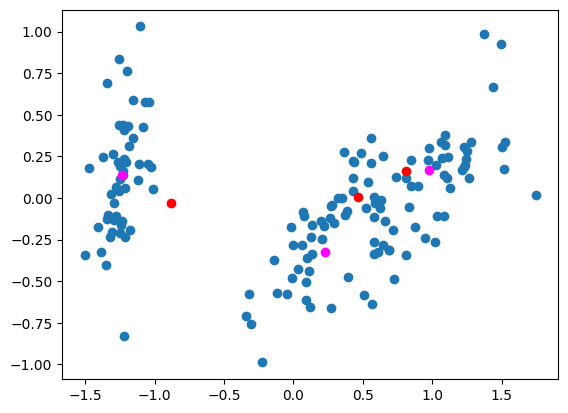

Loss (in 4 dimensions):  0.33312030107729673


In [26]:
iris = np.load("datasets/iris.npy")
iris.shape

# for data visualisation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_2d = pca.fit_transform(iris)
plt.scatter(iris_2d[:,0], iris_2d[:,1])

non_private_centers = KMeans(n_clusters=3).fit(iris).cluster_centers_
non_private_centers_2d = pca.transform(non_private_centers)
plt.scatter(non_private_centers_2d[:,0], non_private_centers_2d[:,1], c="magenta")

p = PrivacyBudget(epsilon=2, method="uniform", total_iter=1)
centers = np.array(dplloyd(k=3, X=iris, n_iter=1, priv=p, seed=6434, return_steps=False))
centers_2d = pca.transform(centers)
plt.scatter(centers_2d[:,0], centers_2d[:,1], c="red")

plt.show()

print("Loss (in 4 dimensions): ", kmeans_loss(centers, iris))

In [22]:
# Experiment for 1,2 or 3 iterations

print("Uniform:")
for total_iterations in range(1,4):
    dplloyd_experiment(iris, 3, 1, "uniform", total_iterations, 50)

print("Dichotomy:")
for total_iterations in range(1,4):
    dplloyd_experiment(iris, 3, 1, "dichotomy", total_iterations, 50)

print("Series Sum:")
for total_iterations in range(1,4):
    dplloyd_experiment(iris, 3, 1, "series sum", total_iterations, 50)




Uniform:
base seed=88788, average loss=0.4874389239524254
base seed=6381, average loss=1.2845755481114491
base seed=85829, average loss=2.1069012549942494
Dichotomy:
base seed=82763, average loss=0.5536162519004402
base seed=27675, average loss=0.7096839888658384
base seed=63166, average loss=1.7386032265242721
Series Sum:
base seed=16522, average loss=1.2079430282044286
base seed=75808, average loss=1.4665599909329752
base seed=70052, average loss=2.487984633874174


Best method appears to be uniform with 1 iteration, followed by dichotomy with 1 iteration and then dichotomy with 2 iterations 

In [25]:
# varying epsilon for top 3 methods

for epsilon in [0.5,1,2,5,10]:
    print("Epsilon = ", epsilon)
    print("Uniform average loss = ", dplloyd_experiment(iris, 3, epsilon, "uniform", 1, trials=50))
    print("Dichotomy 1 average loss = ", dplloyd_experiment(iris, 3, epsilon, "dichotomy", 1, trials=50))
    print("Dichotomy 2 average loss = ", dplloyd_experiment(iris, 3, epsilon, "dichotomy", 2, trials = 50))


Epsilon =  0.5
Uniform average loss =  0.9950763552307453
Dichotomy 1 average loss =  1.3616685656547483
Dichotomy 2 average loss =  1.026086899965496
Epsilon =  1
Uniform average loss =  0.526062197445029
Dichotomy 1 average loss =  0.6514200545468517
Dichotomy 2 average loss =  0.7127391284916699
Epsilon =  2
Uniform average loss =  0.3838034274199856
Dichotomy 1 average loss =  0.45154395562795946
Dichotomy 2 average loss =  0.47144570754916704
Epsilon =  5
Uniform average loss =  0.3385228535328868
Dichotomy 1 average loss =  0.40092540320785225
Dichotomy 2 average loss =  0.35394364620303875
Epsilon =  10
Uniform average loss =  0.3290090032460913
Dichotomy 1 average loss =  0.3497949972145712
Dichotomy 2 average loss =  0.31846095181056244


^ Plateaus after epsilon = 2 

### Large Synthetic

PCA:


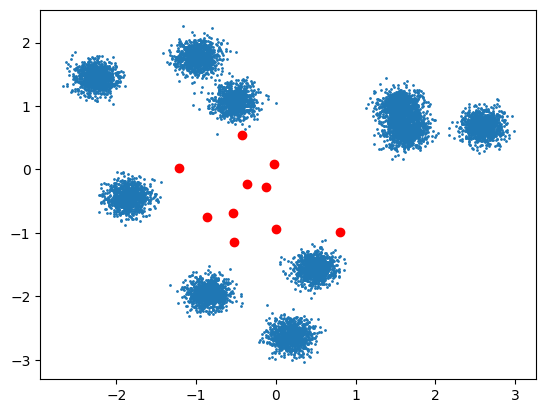

In [13]:
large = np.load("datasets/large-synthetic.npy")
large.shape

large_pca = PCA(n_components=2)
large_2d = large_pca.fit_transform(large)

p = PrivacyBudget(epsilon=1, delta=None, method="dichotomy", total_iter=4)
centers = dplloyd(k=10, X=large, n_iter=4, priv=p, seed=25323, return_steps=False)

centers_2d = large_pca.transform(centers)

plt.scatter(centers_2d[:,0], centers_2d[:,1], c="red")
plt.scatter(large_2d[:,0], large_2d[:,1], s=1)
print("PCA:")

### Concrete

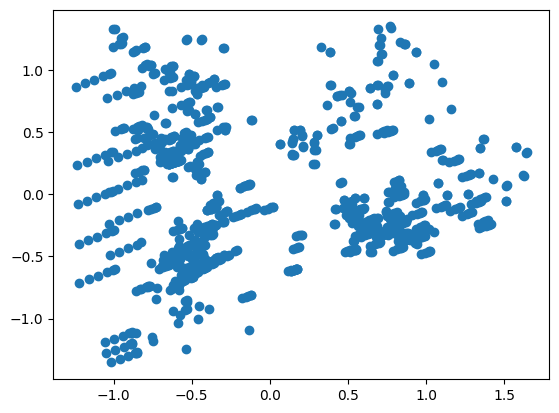

In [19]:
concrete = np.load("datasets/concrete.npy")

concrete_pca = PCA(n_components=2)
concrete_2d = concrete_pca.fit_transform(concrete)

plt.scatter(concrete_2d[:,0], concrete_2d[:,1])


From a visual inspection I would start with k=3. 

(4, 2, 8)
(1030, 8)


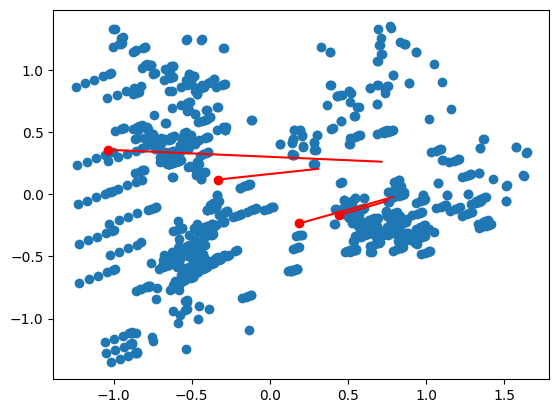

In [45]:
p = PrivacyBudget(epsilon=1, method="uniform", total_iter=1)
centers = np.array(dplloyd(k=4, X=concrete, n_iter=1, priv=p, seed=523847, return_steps=True))
reshaped_centers = centers.transpose(1,0,2)

print(reshaped_centers.shape)
print(concrete.shape)

c = [reshaped_centers[n,:,:] for n in range(4)]
centers_2d = [concrete_pca.transform(d) for d in c]

#non_private_centers = KMeans(n_clusters=5).fit(concrete).cluster_centers_
#non_private_centers_2d = concrete_pca.transform(non_private_centers)

plt.scatter(concrete_2d[:,0], concrete_2d[:,1])
#plt.scatter(non_private_centers_2d[:,0], non_private_centers_2d[:,1], c="yellow")
for x in centers_2d:
    plt.plot(x[:,0], x[:,1], c="red")
    plt.scatter(x[-1,0], x[-1,1], c="red")

In [50]:
for k in range(3,7):
    print("k = ",k)
    dplloyd_experiment(concrete, k, 1, "uniform", 1, trials=50, output=True)

k =  3
base seed=8594, average loss=1.257096661151517
k =  4
base seed=69736, average loss=1.242613894569231
k =  5
base seed=20146, average loss=1.222071096385889
k =  6
base seed=9417, average loss=1.1798776990010773


In [53]:
print("Uniform:")
for total_iterations in range(1,6):
    dplloyd_experiment(concrete, 4, 1, "uniform", total_iterations, 50, output=True)

print("Dichotomy:")
for total_iterations in range(1,6):
    dplloyd_experiment(concrete, 4, 1, "dichotomy", total_iterations, 50, output=True)

print("Series Sum:")
for total_iterations in range(1,6):
    dplloyd_experiment(concrete, 4, 1, "series sum", total_iterations, 50, output=True)

Uniform:
base seed=78156, average loss=1.2600041408337739
base seed=64386, average loss=1.4739685712787136
base seed=40241, average loss=2.020911893029471
base seed=82276, average loss=2.53938085900339
base seed=54542, average loss=3.996060883779711
Dichotomy:
base seed=44341, average loss=1.3523319368987512
base seed=45045, average loss=1.4592551893720123
base seed=22723, average loss=1.57913152030926
base seed=9213, average loss=1.5886243606596637
base seed=55458, average loss=1.699737450360379
Series Sum:
base seed=88788, average loss=1.611654607203884
base seed=6381, average loss=1.6080484525341396
base seed=85829, average loss=1.755602913478525
base seed=82763, average loss=1.7535093427266308
base seed=27675, average loss=2.1441239338228417
